## VAE

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import scanpy as sc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
### Assume data normalized and logged
adata1 = sc.read_h5ad('../data/result section 2/1/data_pp.h5ad')
adata2 = sc.read_h5ad('../data/result section 2/2/data_pp.h5ad')
adata3 = sc.read_h5ad('../data/result section 2/3/data_pp.h5ad')
# adata = sc.concat([adata1,adata2],axis=0)

In [165]:
adata[:500,:].obs['subtype'].value_counts()

cMono        144
NK.CD16hi     77
CD8.TEM       74
CD4.NAIVE     71
CD4.TCM       31
CD8.NAIVE     27
CD4.TEM       18
ncMono         9
cDC            9
B.MEM          9
CD4.CTL        8
B.INT          6
CD8.TCM        3
pDC            3
NK.CD56hi      2
CD4.TREG       2
B.NAIVE        2
Name: subtype, dtype: int64

In [42]:
import pickle
from Classifier.BTree import BTree
from Classifier.BTreeTraversal import BTreeTraversal
from Classifier.Visualize import plot_keymarker,visualize_tree
import pandas as pd

f = open('../output/result 1 scalable/3datasets/test/1/1/tree.pickle','rb')
tree = pickle.load(f)
tree.ind = 0
nodelist = [tree]
nodelabel = pd.DataFrame(index=adata2.obs_names)

while len(nodelist) != 0 :
    node = nodelist.pop(0)
    # print(node.ind)
    if node is not None and  node.key != ('leaf',):
        nodelabel[node.ind] = 0
        if node.left is not None:
            node.left.ind = 2*node.ind + 1
        if node.right is not None:
            node.right.ind = 2*node.ind + 2

        nodelabel.loc[node.left_indices,node.ind]= -1
        nodelabel.loc[node.right_indices,node.ind]= 1
        nodelist.append(node.left)
        nodelist.append(node.right)
    
    # print(nodelist)


In [11]:
import scanpy as sc
import pandas as pd
import pickle
from Classifier.BTree import BTree
from Classifier.BTreeTraversal import BTreeTraversal
from Classifier.Visualize import plot_keymarker,visualize_tree

tree_label = pd.DataFrame()
for i in range(1,4):
    adata = sc.read_h5ad('../data/result 1 scalable/3datasets/'+str(i)+'/data.h5ad')
    f = open('../output/result 1 scalable/3datasets/test/'+str(i)+'/'+str(i)+'/tree.pickle','rb')
    tree = pickle.load(f)
    tree.ind = 0
    nodelist = [tree]
    nodelabel = pd.DataFrame(index=adata.obs_names)

    while len(nodelist) != 0 :
        node = nodelist.pop(0)
        # print(node.ind)
        if node is not None and  node.key != ('leaf',):
            nodelabel[node.ind] = 0
            if node.left is not None:
                node.left.ind = 2*node.ind + 1
            if node.right is not None:
                node.right.ind = 2*node.ind + 2

            nodelabel.loc[node.left_indices,node.ind]= -1
            nodelabel.loc[node.right_indices,node.ind]= 1
            nodelist.append(node.left)
            nodelist.append(node.right)
    tree_label = pd.concat([tree_label, nodelabel],axis=0)

/home/xinzhu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xinzhu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xinzhu/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
tree_label.to_csv('../output/result 1 scalable/3datasets/test/tree_label.csv')

In [5]:
import pandas as pd
import scanpy as sc
import pickle
from Classifier.BTree import BTree
from Classifier.BTreeTraversal import BTreeTraversal
from Classifier.Visualize import plot_keymarker,visualize_tree


adata_pp = sc.read_h5ad('../data/PBMC DATA/all data pp.h5ad')
tree_label = []

j = 1
adata_pp.obs['pred'] = None
for i in range(6):
    batch = adata_pp[adata_pp.obs['datasets']=='s'+str(i+1)].obs['batch'].cat.categories
    for b in batch:
        pred = pd.read_csv('../output/PBMC_/'+str(i+1)+'/'+str(j)+'/leaf_labels.csv',index_col=0)
        f = open('../output/PBMC_/'+str(i+1)+'/'+str(j)+'/tree.pickle','rb')
        tree = pickle.load(f)
        tree.ind = 0
        nodelist = [tree]
        nodelabel = pd.DataFrame(index=tree.indices)
        # adata_pp.obs['pred'].loc[pred.index] = pred['Label']
        j = j + 1    


        while len(nodelist) != 0 :
            node = nodelist.pop(0)
            # print(node.ind)
            if node is not None and  node.key != ('leaf',):
                nodelabel[node.ind] = 0
                if node.left is not None:
                    node.left.ind = 2*node.ind + 1
                if node.right is not None:
                    node.right.ind = 2*node.ind + 2

                nodelabel.loc[node.left_indices,node.ind]= -1
                nodelabel.loc[node.right_indices,node.ind]= 1
                nodelist.append(node.left)
                nodelist.append(node.right)
        
        tree_label.append(nodelabel)

In [6]:
tree_label = pd.concat(tree_label)

In [9]:
tree_label[18].value_counts()

 0    1249832
 1      82578
-1       9915
Name: 18, dtype: int64

In [10]:
tree_label.to_csv('../output/PBMC_/tree_label.csv')

In [44]:
# nodelabel2 = nodelabel
# nodelabel2 = nodelabel
nodelabel = pd.concat([nodelabel1, nodelabel2, nodelabel3],axis=0)
# nodelabel = pd.concat([nodelabel, nodelabel3],axis=0)

In [11]:
adata = sc.read_h5ad('../data/PBMC DATA/all data.h5ad')

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
f = open('../output/9_2/_0/tree.pickle','rb')

tree = pickle.load(f)
tree.ind = 0
queue, idxlist = [tree], [0]
# print(queue)

mapping, embedding = pd.DataFrame(index=adata.var_names), pd.DataFrame(index=adata_pp.obs_names)
while len(queue)>0:
    node = queue.pop(0)
    ind = node.ind
    if node.key != ('leaf',):
        mapping[ind] = 0
        vars = mapping.index.intersection(node.artificial_w.index)
        mapping.loc[vars,ind] = scaler.fit_transform(np.array(node.artificial_w[vars]).reshape(-1, 1))
        embedding[ind] = 0
        # print(node.embedding)
        # embedding.loc[node.embedding.index,ind] = node.embedding[node.key[0]]
        node.left.ind, node.right.ind = 2*node.ind+1, 2*node.ind+2, 
        queue.append(node.left)
        queue.append(node.right)
        idxlist.append(2*ind+1)
        idxlist.append(2*ind+2)
    
mapping.to_csv('../output/9_2/_0/mapping.csv') 

In [37]:
adata[adata.obs['datasets']=='s2'].obs

,batch,datasets
AAACCCAAGACTGTTC-1_s2,1,s2
AAACCCAAGGATCATA-1_s2,1,s2
AAACCCAGTTATTCTC-1_s2,1,s2
AAACCCATCATGAGGG-1_s2,1,s2
AAACGAAAGCCAGTAG-1_s2,1,s2
...,...,...
TTTGTTGAGCGTCGAA-20_s2,20,s2
TTTGTTGAGTGTACCT-20_s2,20,s2
TTTGTTGCAATTGCAC-20_s2,20,s2
TTTGTTGCATTCAGCA-20_s2,20,s2


In [36]:
adata.obs_names = adata_pp.obs_names

In [38]:
import scanpy as sc
import scipy.sparse as sp

# 假设 adata.X 是稠密矩阵
adata.X = sp.csr_matrix(adata.X) 

In [39]:
adata.write_h5ad('../data/PBMC DATA/all data rna.h5ad')

In [48]:
subdata = sc.read_h5ad('../data/result section 2/rna_pp_time0.h5ad')


In [49]:
nodelabel = nodelabel.loc[subdata.obs_names,:]

In [51]:
nodelabel

,0,1,2,3,4,5,6,7,8,12,14,15,17,25,30,52
AAACCCAAGCGGTAAC-1-40_s3,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGCAATGC-1-41_s3,1,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGGCAACT-1-37_s3,1,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTCTAGAA-1-42_s3,-1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AAACCCACACCCGTAG-1-41_s3,1,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2L8_TTTGACTGTCAATGGG_s6,-1,-1,0,-1,0,0,0,-1,0,0,0,-1,0,0,0,0
E2L8_TTTGACTGTCCCGCAA_s6,-1,-1,0,-1,0,0,0,-1,0,0,0,-1,0,0,0,0
E2L8_TTTGATCAGATGTAGT_s6,1,0,-1,0,0,1,0,0,0,-1,0,0,0,-1,0,0
E2L8_TTTGGTTTCGTCAACA_s6,1,0,-1,0,0,1,0,0,0,-1,0,0,0,-1,0,0


In [50]:
nodelabel.to_csv('../data/result section 2/midas/tree_label.csv')

In [45]:
pd.read_csv('../data/result section 2/1v2v3/tree_label.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/result section 2/1v2v3/tree_label.csv'

In [410]:
# 假设 adata 是 AnnData 对象，dataframe 是 DataFrame
n_samples = adata.n_obs

# 生成随机排列索引
shuffled_idx = np.random.permutation(n_samples)

# 打乱 AnnData
shuffled_adata = adata[shuffled_idx]

# 打乱 DataFrame
shuffled_df = nodelabel.iloc[shuffled_idx].reset_index(drop=True)

# 验证一致性
print(shuffled_adata.obs_names)
print(shuffled_df.index)

Index(['E2L2_TAGGTTGGTTCCGCGA_s6', 'E2L4_GCCGTGACACTGTGTA_s6',
       'E2L1_TCGAAGTAGTAACCTC_s6', 'E2L3_CCAATGACAGACAATA_s6',
       'E2L1_TTTGACTAGGTACAGC_s6', 'TAACTTCAGCATTGAA-1-39_s3',
       'TTTACTGAGTCAGCCC-1-39_s3', 'AGGGAGTAGCATCCCG-1-40_s3',
       'E2L2_GGGACTCCAGTGTGCC_s6', 'E2L6_GTGTGATGTTAGGCTT_s6',
       ...
       'E2L1_TCAATTCCACAGCTGC_s6', 'E2L2_TTTACCACAGCCATTA_s6',
       'E2L4_CATCCCACACGTATAC_s6', 'E2L6_TTCTAACAGGGCCTCT_s6',
       'E2L4_CAAGACTGTTCCTTGC_s6', 'E2L2_GATGAGGTCAGAGCAG_s6',
       'E2L3_TCCTTCTGTCGAGTGA_s6', 'GTTACAGTCGCTAAAC-1-42_s3',
       'E2L4_GTTGTAGGTTGTGTAC_s6', 'TCGCTTGAGTGGACGT-1-40_s3'],
      dtype='object', length=38646)
RangeIndex(start=0, stop=38646, step=1)


In [324]:
# 转换为PyTorch张量
adata_ = shuffled_adata
X = adata_.X.toarray() if hasattr(adata_.X, 'toarray') else adata_.X
X = torch.tensor(X, dtype=torch.float32)

# 标准化特征
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(X), dtype=torch.float32)

# 创建DataLoader
dataset = TensorDataset(X)
batch_size = 256
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [244]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, latent_dim=10):
        super(VAE, self).__init__()
        
        # 编码器
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)      # 均值
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)  # 对数方差

        nn.init.constant_(self.fc_logvar.bias, -0.5)  # 初始exp(logvar)≈0.6
        nn.init.normal_(self.fc_logvar.weight, mean=0, std=0.01)  # 小权重
        
        # 解码器
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),

        )
    
    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar



In [270]:
# def tree_contrastive_loss(z, tree_labels, margin=1.0, alpha=1.0):
#     """
#     z: 潜在变量 (n_cells, latent_dim)
#     tree_labels: 多维标签 (n_cells, n_tree_nodes)
#         0 - 不属于该节点
#         1 - 属于该节点的right leaf
#        -1 - 属于该节点的left leaf
#     margin: 不同子节点间的间隔要求
#     alpha: 同一节点内聚程度的权重
#     """
#     loss = 0.0
#     n_nodes = tree_labels.shape[1]
    
#     for k in range(n_nodes):
#         # 提取当前节点的有效标签（非零）
#         mask = tree_labels[:, k] != 0
#         if mask.sum() < 2:  # 至少需要一对样本
#             continue
            
#         z_k = z[mask]
#         labels_k = tree_labels[mask, k]
#         n_valid = z_k.shape[0]
        
#         # 计算样本对的距离（欧氏距离）
#         dist = torch.cdist(z_k, z_k, p=2)  # (n_valid, n_valid)
        
#         # ===== 核心改进 =====
#         # 1. 同一节点内的样本距离惩罚（越小越好）
#         same_node_mask = (labels_k.unsqueeze(1) == labels_k.unsqueeze(0)).float()
#         same_node_mask *= (1 - torch.eye(n_valid, device=z.device))  # 排除自身
#         intra_loss = (same_node_mask * dist.pow(2)).sum() / (same_node_mask.sum() + 1e-6)
        
#         # 2. 不同子节点的样本距离奖励（越大越好，至少margin）
#         diff_node_mask = (labels_k.unsqueeze(1) * labels_k.unsqueeze(0) == -1).float()  # 1和-1配对
#         inter_loss = (diff_node_mask * (margin - dist).clamp(min=0).pow(2)).sum() / (diff_node_mask.sum() + 1e-6)
        
#         # 组合损失（alpha控制同一节点内聚强度）
#         loss += alpha * intra_loss + inter_loss
    
#     return loss / n_nodes

In [489]:
def tree_contrastive_loss(z, tree_labels, margin=2.0):
    """
    z: 潜在变量 (n_cells, latent_dim)
    tree_labels: 多维标签 (n_cells, n_tree_nodes)
    margin: 间隔参数
    """
    loss = 0.0
    n_nodes = tree_labels.shape[1]
    
    for k in range(n_nodes):
        # 提取当前节点的有效标签（非零）
        mask = tree_labels[:, k] != 0
        if mask.sum() < 2:  # 至少需要一对样本
            continue
        
        z_k = z[mask]
        labels_k = tree_labels[mask, k]
        
        # 计算样本对的距离（欧氏距离）
        dist = torch.cdist(z_k, z_k, p=2)  # (n_valid, n_valid)
        
        # 生成标签矩阵：1表示同侧，-1表示异侧
        label_matrix = torch.outer(labels_k, labels_k)  # (n_valid, n_valid)
        
        # 对比损失（hinge loss）
        pos_mask = (label_matrix == 1).float()
        neg_mask = (label_matrix == -1).float()
        
        pos_loss = pos_mask * dist.pow(2)
        neg_loss = neg_mask * (margin - dist).pow(2)
        
        # loss += (pos_loss.sum() + neg_loss.sum()) / (pos_mask.sum() + neg_mask.sum() + 1e-6)
        loss += neg_loss.sum() / (neg_mask.sum().pow(2) + 1e-6)

    return loss
    

In [ ]:
def tree_contrastive_loss(z, tree_labels, tree_cols, margin=2.0):
        """
        z: 潜在变量 (n_cells, latent_dim)
        tree_labels: 多维标签 (n_cells, n_tree_nodes)
        margin: 间隔参数
        """

        
        loss = 0.0
        n_nodes = tree_labels.shape[1]
        node_neg_dists = {}

        for i in range(n_nodes):
            # 提取当前节点的有效标签（非零）
            # print(tree_labels.shape)
            k = tree_cols[i]
            mask = tree_labels[:, i] != 0
            if mask.sum() < 2:  # 至少需要一对样本
                node_neg_dists[k] = None
                continue
            # print('=========####',mask,'####========')
            z_k = z[mask]
            labels_k = tree_labels[mask, i]
            
            # 计算样本对的距离（欧氏距离）
            dist = torch.cdist(z_k, z_k, p=2)  # (n_valid, n_valid)
            
            # 生成标签矩阵：1表示同侧，-1表示异侧
            label_matrix = torch.outer(labels_k, labels_k)  # (n_valid, n_valid)
            
            # 对比损失（hinge loss）
            pos_mask = (label_matrix == 1).float()
            neg_mask = (label_matrix == -1).float()


            if neg_mask.sum() < 2:
                node_neg_dists[k] = None
                continue

            pos_dist = (dist * pos_mask).sum() / pos_mask.sum()
            neg_dist = (dist * neg_mask).sum() / neg_mask.sum()  

            loss += torch.relu(pos_dist - neg_dist + margin)
            # print(dist * neg_mask)
            node_neg_dists[k] = neg_dist

        # 逐层对比约束
        for i in range(n_nodes):
            k = tree_cols[i]
            if node_neg_dists[k] is None:
                continue
                
            # 检查所有直接子节点
            children = [2*k+1, 2*k+2]  # 假设是完美二叉树
            for child in children:
                if child < n_nodes and node_neg_dists[child] is not None:
                    # 约束：父层距离 > 子层距离 + margin
                    loss += torch.relu(node_neg_dists[child] - node_neg_dists[k] + margin)
                    # print(node_neg_dists[child],node_neg_dists[k])
                    
        return loss

In [ ]:
def tree_contrastive_loss(z, tree_labels, tree_cols, margin=1.0):
    """
    z: 潜在变量 (n_cells, latent_dim)
    tree_labels: 多维标签 (n_cells, n_tree_nodes)
    margin: 间隔参数
    """

    
    loss = 0.0
    n_nodes = tree_labels.shape[1]
    node_neg_dists = {}

    for i in range(n_nodes):
        # 提取当前节点的有效标签（非零）
        # print(tree_labels.shape)
        split, subsplit  = {}, {}
        k = tree_cols[i]
        split[-1], split[1] = z[tree_labels[:, i]==-1], z[tree_labels[:, i]==1]
        if len(split[-1]) < 2 or len(split[1]) < 2:
            continue
        for u in [1,2]:
            # print(tree_cols)
            sub_k = torch.where(tree_cols == 2*k+u)[0] 

            if len(sub_k) < 1:
                continue
            sub_k = sub_k[0]
            # print(sub_k)
            subsplit[-1], subsplit[1] = z[tree_labels[:, sub_k]==-1], z[tree_labels[:, sub_k]==1]
            if len(subsplit[-1]) < 2 or len(subsplit[1]) < 2 :
                continue
            subdist = torch.cdist(subsplit[-1], subsplit[1], p=2).mean()
            majordist = torch.cdist(subsplit[int(2*u-3)], split[-int(2*u-3)], p=2).mean()

            dist = torch.cdist(z[tree_labels[:, sub_k]!=0], z[tree_labels[:, sub_k]!=0], p=2)
            label_matrix = torch.outer(tree_labels[:, sub_k], tree_labels[:, sub_k])
            pos_mask = (label_matrix == 1).float()
            neg_mask = (label_matrix == -1).float()
            pos_dist = (dist * pos_mask).sum() / pos_mask.sum()
            neg_dist = (dist * neg_mask).sum() / neg_mask.sum() 


            
            # u=2: d(subsplit[1], split[-1]); u=1:d(subsplit[-1], split[1])
            # subdist < majordist
            loss += torch.relu(subdist - majordist + margin) + torch.relu(pos_dist - neg_dist + margin)
            # if subdist - majordist + margin > 0:
            #     print(k,2*k+u,subdist, majordist)

    return loss



In [484]:
def tree_align_loss(z, tree_labels, dataset_labels):
    """
    z: 潜在变量 (n_samples, latent_dim)
    tree_labels: 多维标签 (n_samples, n_nodes),-1,0,1
    dataset_labels: 数据集标签 (n_samples,)
    """
    align_loss = 0.0
    n_nodes = tree_labels.shape[1]
    
    for k in range(n_nodes):  # 遍历每个节点
        # 分别处理正类和负类（1和-1是不同的类！）
        for class_val in [1, -1]:
            mask = tree_labels[:, k] == class_val
            if mask.sum() < 2:  # 至少需要两个样本
                continue
                
            z_k = z[mask]
            datasets_k = dataset_labels[mask]
            
            # 计算当前类别下的跨数据集中心距离
            centers = []
            for d in torch.unique(datasets_k):
                centers.append(z_k[datasets_k == d].mean(dim=0))
            
            if len(centers) > 1:  # 至少两个数据集
                centers = torch.stack(centers)
                align_loss += torch.mean(torch.cdist(centers, centers))
                # align_loss += torch.clamp(torch.mean(torch.cdist(centers, centers)), min=0, max=1) 
    
    return align_loss / (n_nodes * 2 + 1)  # 除以节点数×2（因为每节点有正负两类）

In [553]:
def metric_learning_loss(z,tree_labels, dataset_labels, lamda=0.05):
    tree_loss = tree_contrastive_loss(z, tree_labels)
    # align_loss = tree_align_loss(z, tree_labels, dataset_labels)
    return lamda*tree_loss # + (1-lamda)*align_loss

In [451]:
def loss_function(recon_x, x, mu, logvar, beta=0.0001):
    # 重构损失（MSE或负对数似然，这里用MSE）
    recon_loss = nn.MSELoss()(recon_x, x) 
    
    # KL散度损失
    # kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kl_div = torch.clamp(kl_div, min=0.2)  # 强制KL≥0.1

    # print('reconstruction loss:',recon_loss.item(),"KL:", kl_div.item())  
    
    return  recon_loss  + beta * kl_div / x.shape[0]

In [260]:
# 检查输入数据统计量
print("输入数据检查:")
print(f"- 均值: {X.mean().item():.4f} | 标准差: {X.std().item():.4f}")
print(f"- 最大值: {X.max().item():.4f} | 最小值: {X.min().item():.4f}")
print(f"- 非零值占比: {(X>0).float().mean().item():.2%}")

输入数据检查:
- 均值: -0.0000 | 标准差: 1.0000
- 最大值: 33.5480 | 最小值: -1.7550
- 非零值占比: 20.86%


In [540]:
def TotalLoss(recon_x, x, mu, logvar, z, tree_labels, dataset_labels=None, alpha=0.9):
    # 原始VAE损失
    vae_loss = loss_function(recon_x, x, mu, logvar)
    
    # 新增的树结构损失（加权）
    # tree_loss = tree_contrastive_loss(z, tree_labels)
    tree_loss = metric_learning_loss(z, tree_labels, dataset_labels)
    
    return (1-alpha) * vae_loss  + alpha * tree_loss

In [389]:
def train(model, dataloader, tree_labels, dataset_labels, epochs=50):
    model.train()
    n_samples = len(dataloader.dataset)  # 总样本数
    for epoch in range(epochs):
        total_loss = 0
        for batch_idx, x in enumerate(dataloader):  # 假设dataloader仅返回x（无索引）
            
            # 获取当前batch的实际大小（处理最后一个不完整batch）
            # if isinstance(x, list):
            #     x = torch.tensor(x, dtype=torch.float32)
            # print(batch_idx, len(x))
            x = x[0]
            current_batch_size = x.shape[0]
            
            # 计算对应的tree_labels行范围（按顺序严格对齐）
            start_idx = batch_idx * dataloader.batch_size
            end_idx = start_idx + current_batch_size
            tree_label = tree_labels.iloc[start_idx:end_idx,:].values
            dataset_label = dataset_labels[start_idx:end_idx]

                    
            # 转换为Tensor并移至设备
            tree_label = torch.as_tensor(tree_label, dtype=torch.float32).to(x.device)
            # dataset_labels = torch.tensor(dataset_labels).to(x.device)
            
            # 训练步骤
            optimizer.zero_grad()
            recon_x, mu, logvar = model(x)
            z = model.reparameterize(mu, logvar)
            loss = TotalLoss(recon_x, x, mu, logvar, z,tree_label, dataset_label, alpha=0.1)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

In [554]:
# 初始化模型
input_dim = X.shape[1]
model = VAE(input_dim=input_dim, latent_dim=10)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
nodelabel_ = shuffled_df
dataset_labels = torch.tensor(adata_.obs['batch'].cat.codes.values, dtype=torch.long) 

train(model, dataloader, nodelabel_, dataset_labels, epochs=20)

Epoch 1/20, Loss: 0.9086
Epoch 2/20, Loss: 0.8419
Epoch 3/20, Loss: 0.8272
Epoch 4/20, Loss: 0.8175
Epoch 5/20, Loss: 0.8137
Epoch 6/20, Loss: 0.8111
Epoch 7/20, Loss: 0.8092
Epoch 8/20, Loss: 0.8077
Epoch 9/20, Loss: 0.8065
Epoch 10/20, Loss: 0.8057
Epoch 11/20, Loss: 0.8049
Epoch 12/20, Loss: 0.8038
Epoch 13/20, Loss: 0.8030
Epoch 14/20, Loss: 0.8021
Epoch 15/20, Loss: 0.8014
Epoch 16/20, Loss: 0.8007
Epoch 17/20, Loss: 0.7999
Epoch 18/20, Loss: 0.7995
Epoch 19/20, Loss: 0.7990
Epoch 20/20, Loss: 0.7987


In [555]:
# 提取潜在变量
model.eval()
with torch.no_grad():
    # 同时获取mu和logvar
    mu, logvar = model.encode(X)  
    
    # 方案1：使用重参数化采样（推荐）
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    z = (mu + eps * std).numpy()  # 保留随机性

print("mu均值:", mu.mean().item(), "±", mu.std().item())  # 理想值：~0 ±1
print("logvar均值:", logvar.mean().item())  # 理想值：略小于0

mu均值: -0.000841607921756804 ± 0.0897112563252449
logvar均值: -8.675783157348633


In [16]:
sc.set_figure_params(facecolor='white')

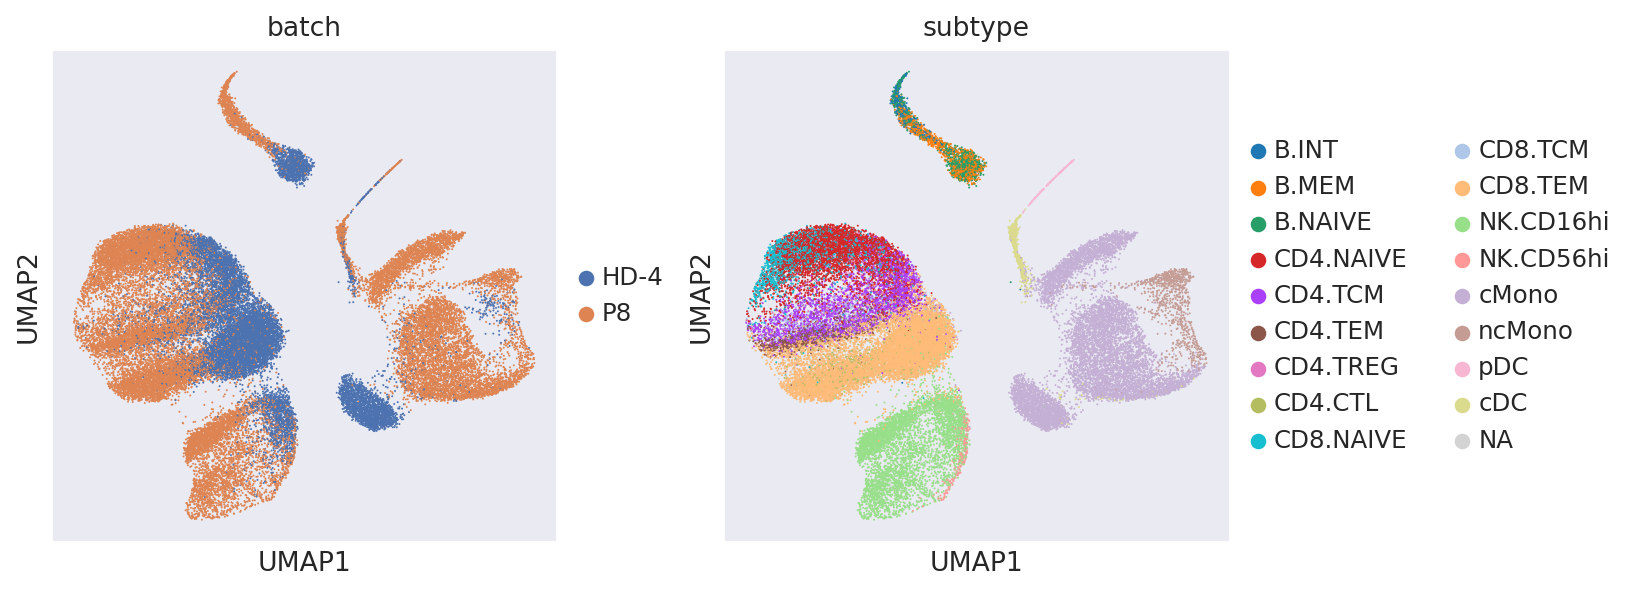

In [556]:
adata_lda = adata_.copy()
adata_lda.obsm['vae'] = z
sc.pp.neighbors(adata_lda, n_neighbors=20, key_added='vae' ,use_rep='vae' ) #
sc.tl.umap(adata_lda,neighbors_key='vae')
sc.pl.umap(adata_lda,color=['batch','subtype'])

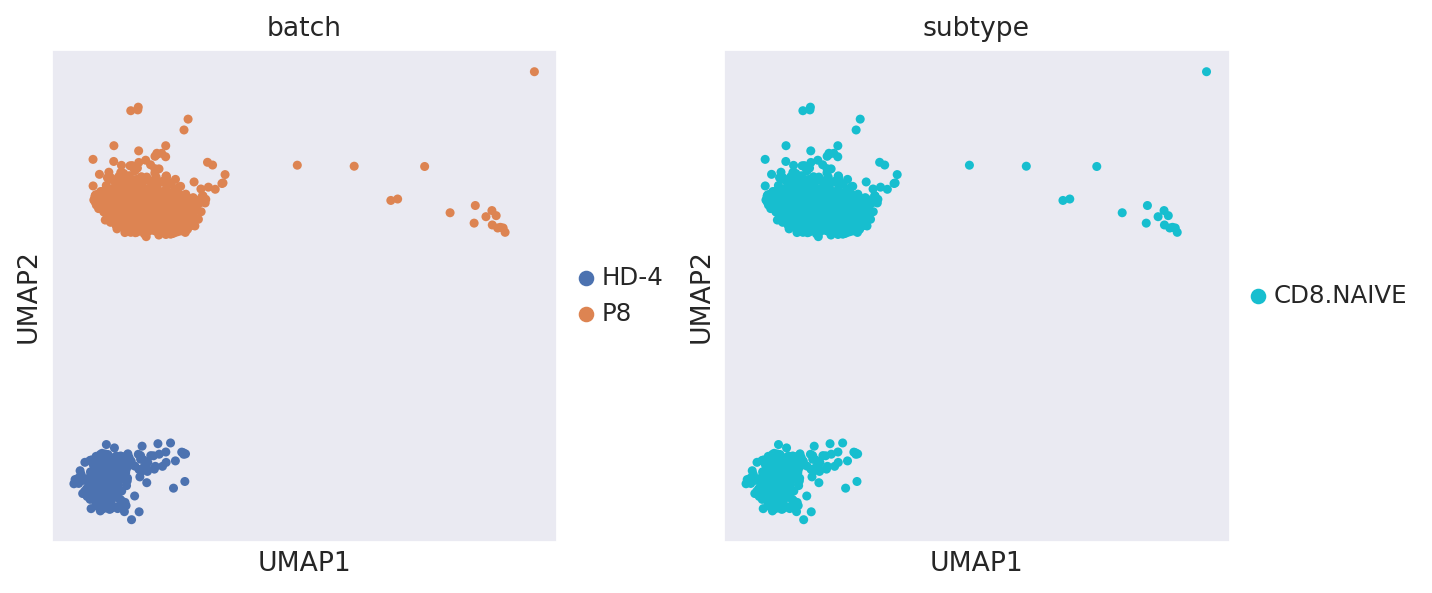

In [513]:
# adata_lda.obs['shuffle_batch'] = dataset_labels
sc.pl.umap(adata_lda[adata_lda.obs['subtype']=='CD8.NAIVE'],color=['batch','subtype'])

In [130]:
adata.obsm['vae'][:,1].min()

-1.5899214e-08

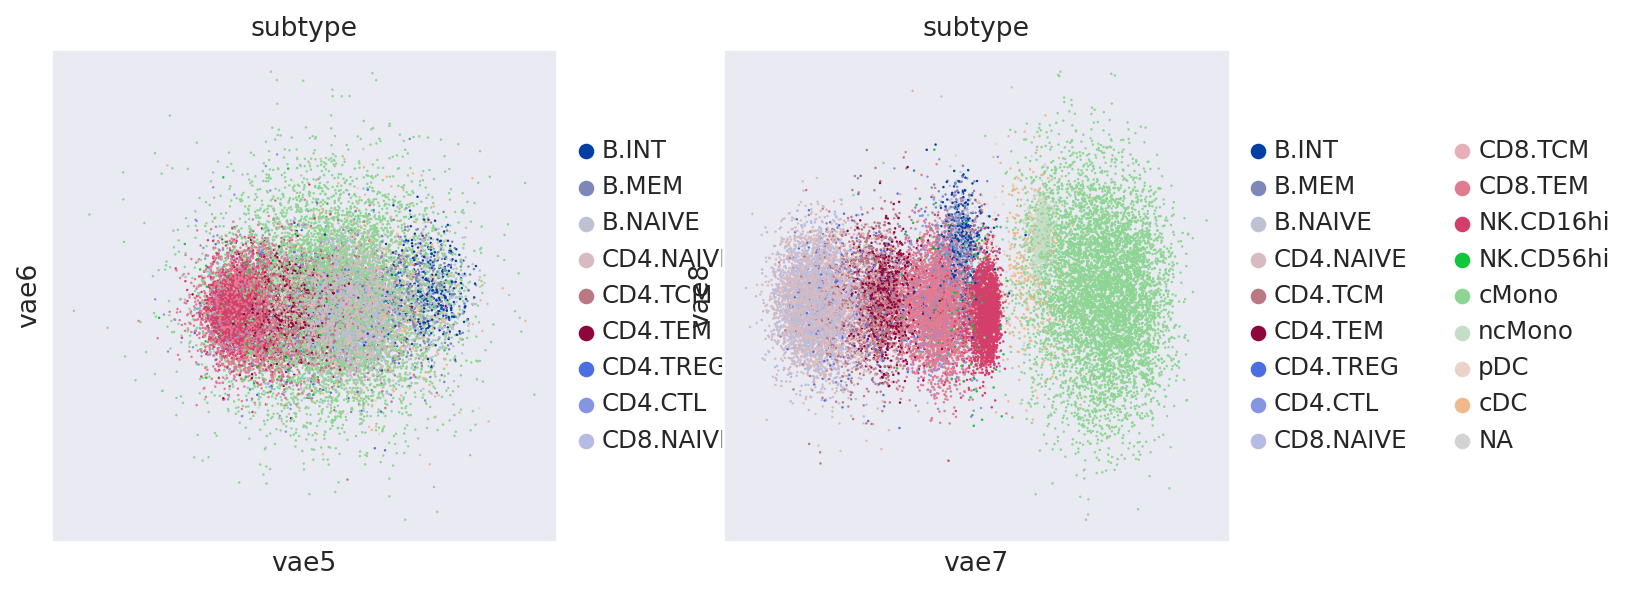

In [277]:
sc.pl.embedding(adata_lda,basis='vae',components=['5,6','7,8'],color='subtype')

## scVI

In [453]:
from scvi.models import VAE

In [ ]:
class metric_vae(VAE):
    def __init__(
        self,
        n_input: int,
        tree_labels: torch.Tensor,  # 新增：传入树状标签
        contrastive_margin: float = 1.0,  # 对比损失间隔参数
        **kwargs
    ):
        super().__init__(n_input=n_input, **kwargs)
        self.tree_labels = tree_labels  # 保存标签
        self.contrastive_margin = contrastive_margin

# MIDAS

In [ ]:
from scmidas.model import MIDAS